In [44]:
import os
import operator

import nltk
import networkx as nx
import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sb
import Graph

%matplotlib inline
# rcParams['figure.figsize'] = 5,4
sb.set_style("whitegrid")


In [45]:
graph = Graph.Graph()

In [46]:
def createVertex(graph, vertex):
    for i in vertex:
        graph.add_vertex(vertex[i]['Id'])

In [47]:
def createEdge(graph, source, dest, weight, direction):
    graph.add_edge(source, dest, weight)
    if direction:
        graph.add_edge(dest, source, weight)

In [82]:
def buildGraphNodes(nodesNumber):
    nodes = dict()
    i = -1
    with open("amazon-meta.txt") as file:
        for line in file:
            if "Id:" in line:
                i = i + 1
                nodes[i] = dict()
                s = str(line)
                s = s.split(":")
                nodes[i][s[0]] = s[1].split("\n")[0]

            else:
                # Exlcui o campo review
                if "reviews" not in line:
                    s = str(line).split(":")
                    if len(s) > 1:
                        nodes[i][s[0]] = s[1].split("\n")[0]
                else:
                    s = str(line).split(":")
                    nodes[i]["rating"] = s[-1].split("\n")[0]
                        
            if i+1 == nodesNumber:
                return nodes
    return nodes
nodes = buildGraphNodes(2500)

In [83]:
createVertex(graph, nodes)

In [84]:
def printGraph(g):
    for v in g:
        for w in v.get_connections():
            vid = v.get_id()
            wid = w.get_id()
            print ('( %s , %s, %3d)'  % ( vid, wid, v.get_weight(w)))

    for v in g:
        print ('g.vert_dict[%s]=%s' %(v.get_id(), g.vert_dict[v.get_id()]))

In [85]:
# printGraph(graph)

In [86]:
def buildGraphEdges(real_graph):
    similar = list()
    #Obtem os nos similares de cada produto
    for i in range(len(nodes)):
        try:
            similar = nodes[i]["  similar"]
    
            # Checa qual eh o no similar
            for k in range(len(nodes)):
                if nodes[k]["ASIN"] in similar:
                    createEdge(real_graph, nodes[i]["Id"], nodes[k]["Id"], 1, True ) 
        except KeyError:
            pass

In [87]:
buildGraphEdges(graph)
# printGraph(graph)

In [88]:
def buildEdgesDictionary(graph):
    edges = {i.get_id(): dict() for i in graph}
    for w in graph:
#         print("W: " + repr(w.get_id()))
        for k in w.get_connections():
            edges[w.get_id()] = {k.get_id(): w.get_weight(k)}
#             print("K: "+repr(k.get_id()))
    return edges
        
    

In [89]:
aux_graph = buildEdgesDictionary(graph)


In [90]:
# real_graph = dict()
# for i in range(len(nodes)):
#     index = nodes[i]["Id"]
#     real_graph[index] = list()

In [91]:
G = nx.Graph()
G.add_nodes_from([nodes[i]["Id"] for i in range(len(nodes))])

In [92]:
edges = list()
l = list()
for k in aux_graph:
    e = aux_graph[k]
    edges = [(k, i) for i in e]
    G.add_edges_from(edges)

/home/victor/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/victor/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/victor/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/victor/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

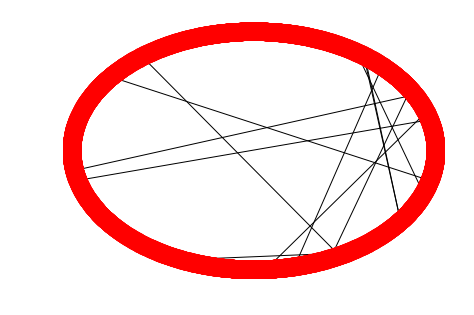

In [93]:
nx.draw_circular(G, node_color="red", with_labels=False)

/home/victor/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/victor/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/victor/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/victor/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

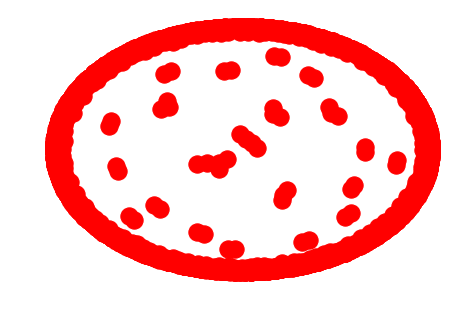

In [94]:
nx.draw_spring(G)

In [63]:
G=nx.random_geometric_graph(200,0.125)
pos=nx.get_node_attributes(G,'pos')

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G,ncenter)

## Calculando as medidas de centralidade

In [64]:
dist, path = graph.allShortestPaths()

### Degree
Grau dos vértices: número de arestas incidentes sobre um vértice.

In [67]:
for v in graph:
    print(str(v.get_id()) + ": " + str(v.degree()))

   0: 0
   1: 0
   2: 0
   3: 0
   4: 0
   5: 0
   6: 0
   7: 0
   8: 0
   9: 0
   10: 0
   11: 0
   12: 0
   13: 0
   14: 0
   15: 0
   16: 0
   17: 0
   18: 0
   19: 0
   20: 0
   21: 0
   22: 0
   23: 0
   24: 0
   25: 0
   26: 0
   27: 0
   28: 0
   29: 0
   30: 0
   31: 0
   32: 0
   33: 0
   34: 0
   35: 0
   36: 0
   37: 0
   38: 0
   39: 0
   40: 0
   41: 0
   42: 0
   43: 0
   44: 0
   45: 0
   46: 0
   47: 0
   48: 0
   49: 0
   50: 0
   51: 0
   52: 0
   53: 0
   54: 0
   55: 0
   56: 0
   57: 0
   58: 0
   59: 0
   60: 0
   61: 0
   62: 0
   63: 0
   64: 0
   65: 0
   66: 0
   67: 0
   68: 0
   69: 0
   70: 0
   71: 0
   72: 0
   73: 0
   74: 0
   75: 0
   76: 0
   77: 0
   78: 0
   79: 0
   80: 0
   81: 0
   82: 0
   83: 0
   84: 0
   85: 0
   86: 0
   87: 0
   88: 0
   89: 0
   90: 0
   91: 0
   92: 0
   93: 0
   94: 0
   95: 0
   96: 0
   97: 0
   98: 0
   99: 0
   100: 0
   101: 0
   102: 0
   103: 0
   104: 0
   105: 0
   106: 0
   107: 0
   108: 0
   109: 0
   110: 0


### Closeness
Comprimento médio do caminho mais curto entre um vértice e todos os outros vértices do grafo.

In [68]:
for v in graph:
    print(str(v.get_id()) + ": " + str(v.closeness(dist[v.get_id()])))

   0: 1.001001001001001e-06
   1: 1.001001001001001e-06
   2: 1.001001001001001e-06
   3: 1.001001001001001e-06
   4: 1.001001001001001e-06
   5: 1.001001001001001e-06
   6: 1.001001001001001e-06
   7: 1.001001001001001e-06
   8: 1.001001001001001e-06
   9: 1.001001001001001e-06
   10: 1.001001001001001e-06
   11: 1.001001001001001e-06
   12: 1.001001001001001e-06
   13: 1.001001001001001e-06
   14: 1.001001001001001e-06
   15: 1.001001001001001e-06
   16: 1.001001001001001e-06
   17: 1.001001001001001e-06
   18: 1.001001001001001e-06
   19: 1.001001001001001e-06
   20: 1.001001001001001e-06
   21: 1.001001001001001e-06
   22: 1.001001001001001e-06
   23: 1.001001001001001e-06
   24: 1.001001001001001e-06
   25: 1.001001001001001e-06
   26: 1.001001001001001e-06
   27: 1.001001001001001e-06
   28: 1.001001001001001e-06
   29: 1.001001001001001e-06
   30: 1.001001001001001e-06
   31: 1.001001001001001e-06
   32: 1.001001001001001e-06
   33: 1.001001001001001e-06
   34: 1.001001001001001

### Betweenness
Quantifica o número de vezes que um vértice age como uma ponte ao longo do
caminho mais curto entre dois outros vértices.

In [69]:
graph.betweenness()

{'   0': 1.0,
 '   1': 1.0,
 '   2': 1.0,
 '   3': 1.0,
 '   4': 1.0,
 '   5': 1.0,
 '   6': 1.0,
 '   7': 1.0,
 '   8': 1.0,
 '   9': 1.0,
 '   10': 1.0,
 '   11': 1.0,
 '   12': 1.0,
 '   13': 1.0,
 '   14': 1.0,
 '   15': 1.0,
 '   16': 1.0,
 '   17': 1.0,
 '   18': 1.0,
 '   19': 1.0,
 '   20': 1.0,
 '   21': 1.0,
 '   22': 1.0,
 '   23': 1.0,
 '   24': 1.0,
 '   25': 1.0,
 '   26': 1.0,
 '   27': 1.0,
 '   28': 1.0,
 '   29': 1.0,
 '   30': 1.0,
 '   31': 1.0,
 '   32': 1.0,
 '   33': 1.0,
 '   34': 1.0,
 '   35': 1.0,
 '   36': 1.0,
 '   37': 1.0,
 '   38': 1.0,
 '   39': 1.0,
 '   40': 1.0,
 '   41': 1.0,
 '   42': 1.0,
 '   43': 1.0,
 '   44': 1.0,
 '   45': 1.0,
 '   46': 1.0,
 '   47': 1.0,
 '   48': 1.0,
 '   49': 1.0,
 '   50': 1.0,
 '   51': 1.0,
 '   52': 1.0,
 '   53': 1.0,
 '   54': 1.0,
 '   55': 1.0,
 '   56': 1.0,
 '   57': 1.0,
 '   58': 1.0,
 '   59': 1.0,
 '   60': 1.0,
 '   61': 1.0,
 '   62': 1.0,
 '   63': 1.0,
 '   64': 1.0,
 '   65': 1.0,
 '   66': 1.0,
 '   

### Coeficiente de clustering
Mede o grau com que os nós de um grafo tendem a agrupar-se.

In [22]:
graph.clustering()

{'   0': 0,
 '   1': 0,
 '   10': 0,
 '   11': 0,
 '   12': 0,
 '   13': 0,
 '   14': 0,
 '   15': 0,
 '   16': 0,
 '   17': 0,
 '   18': 0,
 '   19': 0,
 '   2': 0,
 '   20': 0,
 '   21': 0,
 '   22': 0,
 '   23': 0,
 '   24': 0,
 '   25': 0,
 '   26': 0,
 '   27': 0,
 '   28': 0,
 '   29': 0,
 '   3': 0,
 '   30': 0,
 '   31': 0,
 '   32': 0,
 '   33': 0,
 '   34': 0,
 '   35': 0,
 '   36': 0,
 '   37': 0,
 '   38': 0,
 '   39': 0,
 '   4': 0,
 '   40': 0,
 '   41': 0,
 '   42': 0,
 '   43': 0,
 '   44': 0,
 '   45': 0,
 '   46': 0,
 '   47': 0,
 '   48': 0,
 '   49': 0,
 '   5': 0,
 '   50': 0,
 '   51': 0,
 '   52': 0,
 '   53': 0,
 '   54': 0,
 '   55': 0,
 '   56': 0,
 '   57': 0,
 '   58': 0,
 '   59': 0,
 '   6': 0,
 '   60': 0,
 '   61': 0,
 '   62': 0,
 '   63': 0,
 '   64': 0,
 '   65': 0,
 '   66': 0,
 '   67': 0,
 '   68': 0,
 '   69': 0,
 '   7': 0,
 '   70': 0,
 '   71': 0,
 '   72': 0,
 '   73': 0,
 '   74': 0,
 '   75': 0,
 '   76': 0,
 '   77': 0,
 '   78': 0,
 '   79

In [43]:
nx_betweenness = nx.betweenness_centrality(G)


{'   0': 0.0,
 '   1': 0.0,
 '   2': 0.0,
 '   3': 0.0,
 '   4': 0.0,
 '   5': 0.0,
 '   6': 0.0,
 '   7': 0.0,
 '   8': 0.0,
 '   9': 0.0,
 '   10': 0.0,
 '   11': 0.0,
 '   12': 0.0,
 '   13': 0.0,
 '   14': 0.0,
 '   15': 0.0,
 '   16': 0.0,
 '   17': 0.0,
 '   18': 0.0,
 '   19': 0.0,
 '   20': 0.0,
 '   21': 0.0,
 '   22': 0.0,
 '   23': 0.0,
 '   24': 0.0,
 '   25': 0.0,
 '   26': 0.0,
 '   27': 0.0,
 '   28': 0.0,
 '   29': 0.0,
 '   30': 0.0,
 '   31': 0.0,
 '   32': 0.0,
 '   33': 0.0,
 '   34': 0.0,
 '   35': 0.0,
 '   36': 0.0,
 '   37': 0.0,
 '   38': 0.0,
 '   39': 0.0,
 '   40': 0.0,
 '   41': 0.0,
 '   42': 0.0,
 '   43': 0.0,
 '   44': 0.0,
 '   45': 0.0,
 '   46': 0.0,
 '   47': 0.0,
 '   48': 0.0,
 '   49': 0.0,
 '   50': 0.0,
 '   51': 0.0,
 '   52': 0.0,
 '   53': 0.0,
 '   54': 0.0,
 '   55': 0.0,
 '   56': 0.0,
 '   57': 0.0,
 '   58': 0.0,
 '   59': 0.0,
 '   60': 0.0,
 '   61': 0.0,
 '   62': 0.0,
 '   63': 0.0,
 '   64': 0.0,
 '   65': 0.0,
 '   66': 0.0,
 '   

In [28]:
nx.closeness_centrality(G)

{'   0': 0.0,
 '   1': 0.0,
 '   10': 0.0,
 '   11': 0.0,
 '   12': 0.0,
 '   13': 0.0,
 '   14': 0.0,
 '   15': 0.0,
 '   16': 0.0,
 '   17': 0.0,
 '   18': 0.0,
 '   19': 0.0,
 '   2': 0.0,
 '   20': 0.0,
 '   21': 0.0,
 '   22': 0.0,
 '   23': 0.0,
 '   24': 0.0,
 '   25': 0.0,
 '   26': 0.0,
 '   27': 0.0,
 '   28': 0.0,
 '   29': 0.0,
 '   3': 0.0,
 '   30': 0.0,
 '   31': 0.0,
 '   32': 0.0,
 '   33': 0.0,
 '   34': 0.0,
 '   35': 0.0,
 '   36': 0.0,
 '   37': 0.0,
 '   38': 0.0,
 '   39': 0.0,
 '   4': 0.0,
 '   40': 0.0,
 '   41': 0.0,
 '   42': 0.0,
 '   43': 0.0,
 '   44': 0.0,
 '   45': 0.0,
 '   46': 0.0,
 '   47': 0.0,
 '   48': 0.0,
 '   49': 0.0,
 '   5': 0.0,
 '   50': 0.0,
 '   51': 0.0,
 '   52': 0.0,
 '   53': 0.0,
 '   54': 0.0,
 '   55': 0.0,
 '   56': 0.0,
 '   57': 0.0,
 '   58': 0.0,
 '   59': 0.0,
 '   6': 0.0,
 '   60': 0.0,
 '   61': 0.0,
 '   62': 0.0,
 '   63': 0.0,
 '   64': 0.0,
 '   65': 0.0,
 '   66': 0.0,
 '   67': 0.0,
 '   68': 0.0,
 '   69': 0.0,
 '

In [29]:
nx.degree(G)

{'   0': 0,
 '   1': 0,
 '   10': 0,
 '   11': 0,
 '   12': 0,
 '   13': 0,
 '   14': 0,
 '   15': 0,
 '   16': 0,
 '   17': 0,
 '   18': 0,
 '   19': 0,
 '   2': 0,
 '   20': 0,
 '   21': 0,
 '   22': 0,
 '   23': 0,
 '   24': 0,
 '   25': 0,
 '   26': 0,
 '   27': 0,
 '   28': 0,
 '   29': 0,
 '   3': 0,
 '   30': 0,
 '   31': 0,
 '   32': 0,
 '   33': 0,
 '   34': 0,
 '   35': 0,
 '   36': 0,
 '   37': 0,
 '   38': 0,
 '   39': 0,
 '   4': 0,
 '   40': 0,
 '   41': 0,
 '   42': 0,
 '   43': 0,
 '   44': 0,
 '   45': 0,
 '   46': 0,
 '   47': 0,
 '   48': 0,
 '   49': 0,
 '   5': 0,
 '   50': 0,
 '   51': 0,
 '   52': 0,
 '   53': 0,
 '   54': 0,
 '   55': 0,
 '   56': 0,
 '   57': 0,
 '   58': 0,
 '   59': 0,
 '   6': 0,
 '   60': 0,
 '   61': 0,
 '   62': 0,
 '   63': 0,
 '   64': 0,
 '   65': 0,
 '   66': 0,
 '   67': 0,
 '   68': 0,
 '   69': 0,
 '   7': 0,
 '   70': 0,
 '   71': 0,
 '   72': 0,
 '   73': 0,
 '   74': 0,
 '   75': 0,
 '   76': 0,
 '   77': 0,
 '   78': 0,
 '   79